#Problem Statement:Airbnb Hotel Booking Analysis

This study analyzes NYC Airbnb data to understand short-term rental market dynamics. Using data cleaning, exploratory analysis, and visualization techniques, the research examines three core areas: listing availability patterns, pricing strategies, and customer satisfaction metrics.

Airbnb operates as a commission-based platform that facilitates transactions between property hosts and guests without direct property ownership. This model creates distinct market behaviors compared to traditional hospitality services.

The analysis focuses on NYC's competitive lodging environment to identify key factors driving market performance. Research findings provide actionable insights for stakeholders including hosts, property managers, and platform operators navigating the digital accommodation sector.

Results contribute to understanding how online marketplaces function within major urban markets and offer data-driven guidance for strategic decision-making in short-term rental operations.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df=pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory=False)

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78075 entries, 0 to 78074
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              78075 non-null  int64  
 1   NAME                            77856 non-null  object 
 2   host id                         78075 non-null  int64  
 3   host_identity_verified          77848 non-null  object 
 4   host name                       77779 non-null  object 
 5   neighbourhood group             78046 non-null  object 
 6   neighbourhood                   78059 non-null  object 
 7   lat                             78067 non-null  float64
 8   long                            78067 non-null  float64
 9   country                         77752 non-null  object 
 10  country code                    77989 non-null  object 
 11  instant_bookable                77989 non-null  object 
 12  cancellation_policy             

In [8]:
df.duplicated().value_counts()

,count
False,78075


In [9]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [10]:
#drop duplicate words
df.drop_duplicates(inplace=True)

#drop house_rules and license columns with insufficient data
df.drop(['house_rules','license'],axis=1,inplace=True)

#Remove all dollar signs in the price and service fee columns
df['price']=df['price'].str.replace('$','')
df['service fee']=df['service fee'].str.replace('$','')

#Remove all commas in the price and service fee columns
df['price']=df['price'].str.replace(',','')
df['service fee']=df['service fee'].str.replace(',','')

#Rename the price and service fee columns to include a dollar sign
df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)

#Drop all records with missing values
df.dropna(inplace=True)

#change all mismatched data types to the appropriate once
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

#Correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

#get rid of outliers in the 'availability 365' column data
df=df.drop(df[df['availability 365']>500].index)

/tmp/ipython-input-2407529759.py:26: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review']=pd.to_datetime(df['last review'])


In [11]:
df.duplicated().value_counts()

,count
False,63782


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63782 entries, 0 to 78073
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              63782 non-null  object        
 1   NAME                            63782 non-null  object        
 2   host id                         63782 non-null  object        
 3   host_identity_verified          63782 non-null  object        
 4   host name                       63782 non-null  object        
 5   neighbourhood group             63782 non-null  object        
 6   neighbourhood                   63782 non-null  object        
 7   lat                             63782 non-null  float64       
 8   long                            63782 non-null  float64       
 9   country                         63782 non-null  object        
 10  country code                    63782 non-null  object        
 11  instant

In [13]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,63782.000000,63782.000000,63782.000000,63782.000000,63782.000000,63782.000000,63782.000000,63782,63782.000000,63782.000000,63782.000000,63782.000000
mean,40.727373,-73.948489,2012.492866,625.694553,125.139742,7.875153,33.368709,2019-08-14 07:12:05.960302336,1.392456,3.301417,8.078031,149.870920
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687580,-73.982440,2008.000000,339.000000,68.000000,2.000000,3.000000,2018-12-30 00:00:00,0.230000,2.000000,1.000000,14.000000
50%,40.721470,-73.953920,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-20 00:00:00,0.780000,3.000000,1.000000,121.000000
75%,40.762477,-73.930720,2017.000000,913.000000,183.000000,5.000000,38.000000,2021-03-21 18:00:00,2.010000,4.000000,3.000000,277.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056190,0.050743,5.759692,331.991648,66.402272,30.807840,55.080717,NaN,1.791336,1.268467,33.071738,133.715867


In [14]:
# what are different property types in the dataset
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,34518
Private room,27905
Shared room,1251
Hotel room,108


###What are the different property types in the dataset?

Text(0.5, 1.0, 'Property Types and their count in the Dataset')

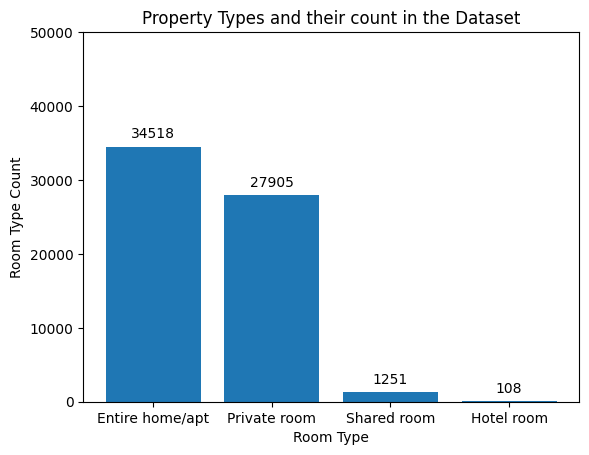

In [15]:
# room type count plotted on a barchart
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset')

In [16]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,26578
Brooklyn,26238
Queens,8584
Bronx,1765
Staten Island,617


###Which neighbourhood group has the highest number of listings?

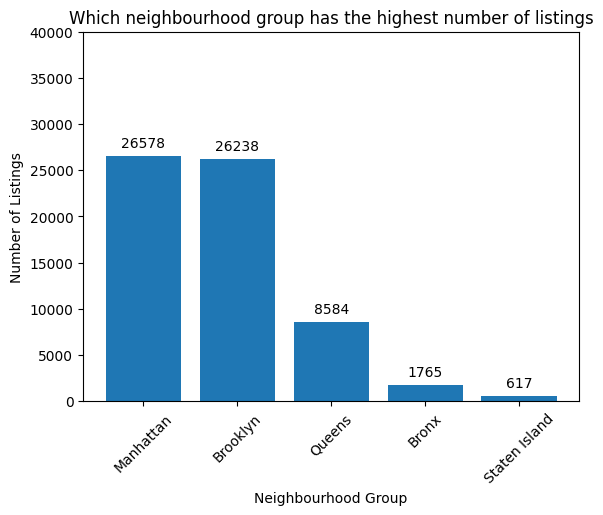

In [17]:
# room type count plotted on a barchart
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which neighbourhood group has the highest number of listings');

###Which neighbourhoods group have the highest average prices for Airbnb listings?

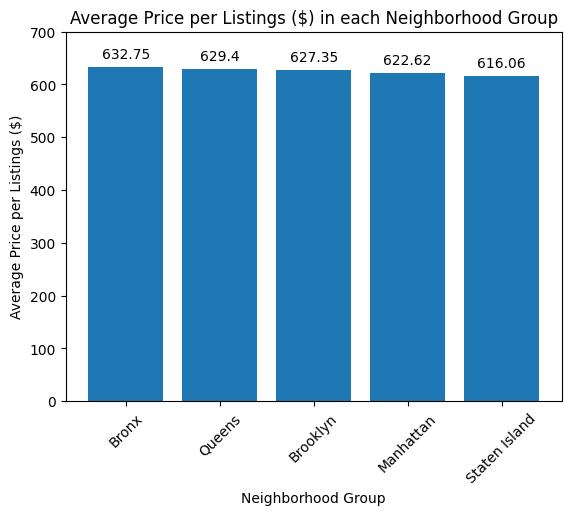

In [18]:
#which neighborhoods group have the highest average prices for Airbnb listings?
avg_price=df.groupby('neighbourhood group') ['price_$'].mean().sort_values (ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

###Is there a relationship between the construction year of property and price?

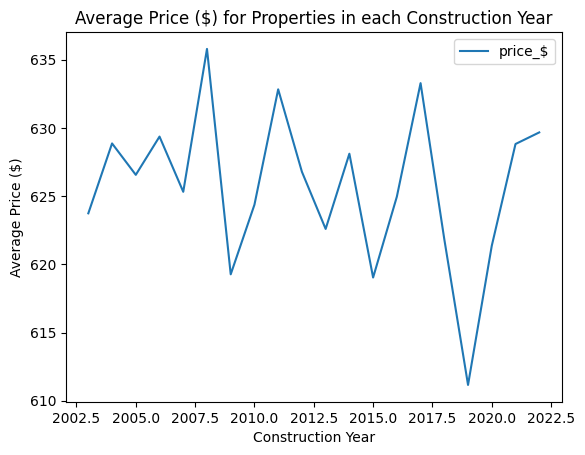

In [19]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year']) ['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

###Who are the top 10 hosts by calculated host listing count?

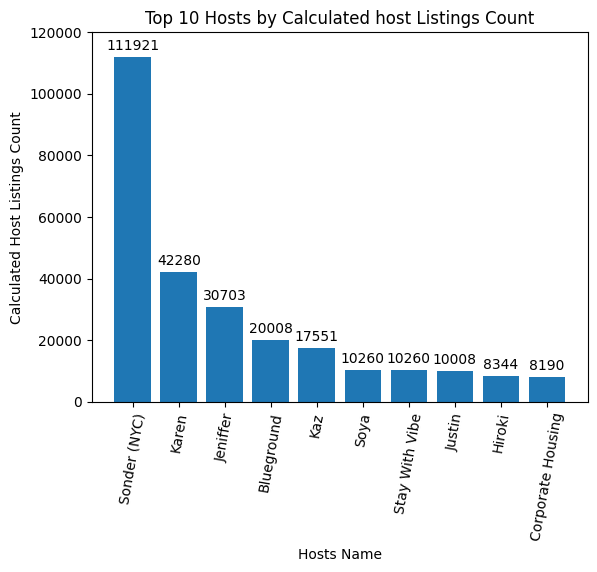

In [20]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name') ['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label (hosts_bar, label=hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

###Are hosts with verified identities more likely to receive positive reviews?

In [21]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.301728
verified,3.301107


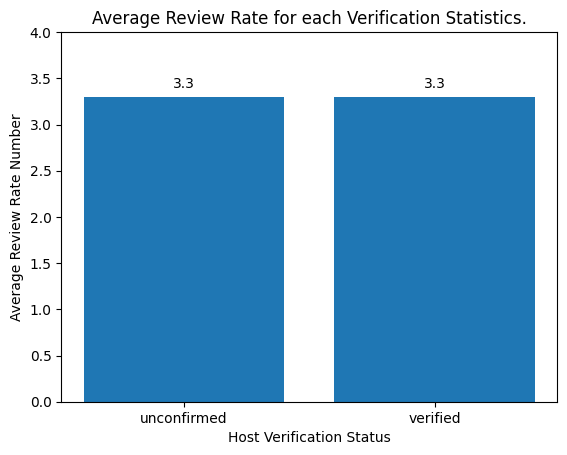

In [22]:
review_bar=plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels=round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

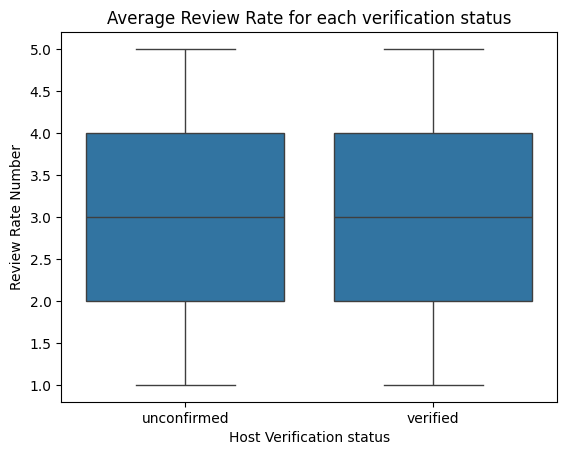

In [23]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color);
plt.xlabel('Host Verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each verification status');

###Is there a correlation between the price of a listing and its service fee?

In [24]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909225896597)

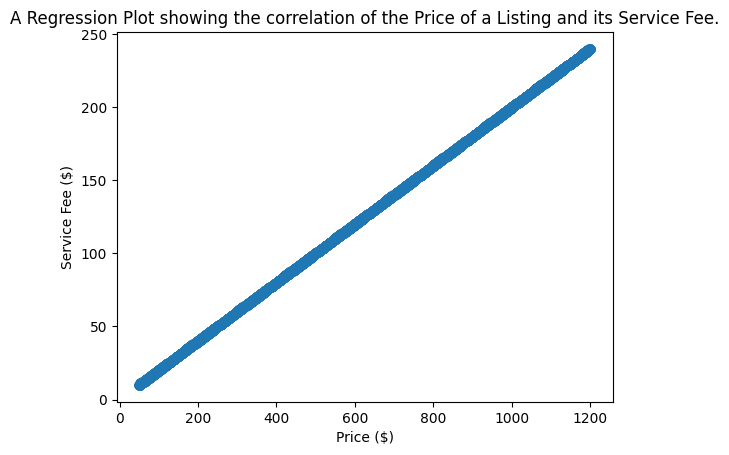

In [25]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service Fee.');

###What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [26]:
#what is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN=df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.411429
                    Private room               3.349650
                    Shared room                3.390625
Brooklyn            Entire home/apt            3.263619
                    Hotel room                 3.833333
                    Private room               3.299224
                    Shared room                3.357942
Manhattan           Entire home/apt            3.292303
                    Hotel room                 3.500000
                    Private room               3.302359
                    Shared room                3.275194
Queens              Entire home/apt            3.369949
                    Hotel room                 3.750000
                    Private room               3.341317
                    Shared room                3.283105
Staten Island       Entire home/apt            3.387692
                    Private room               3.505226
                    Shared room                3.600000

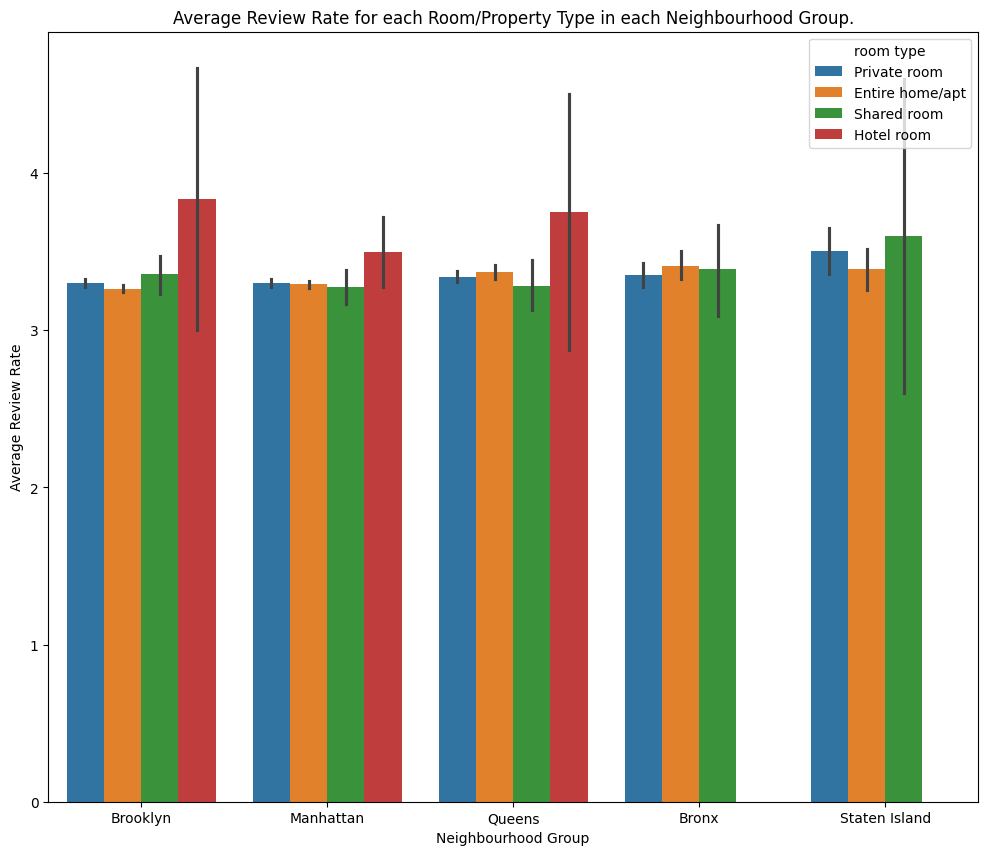

In [27]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

###Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

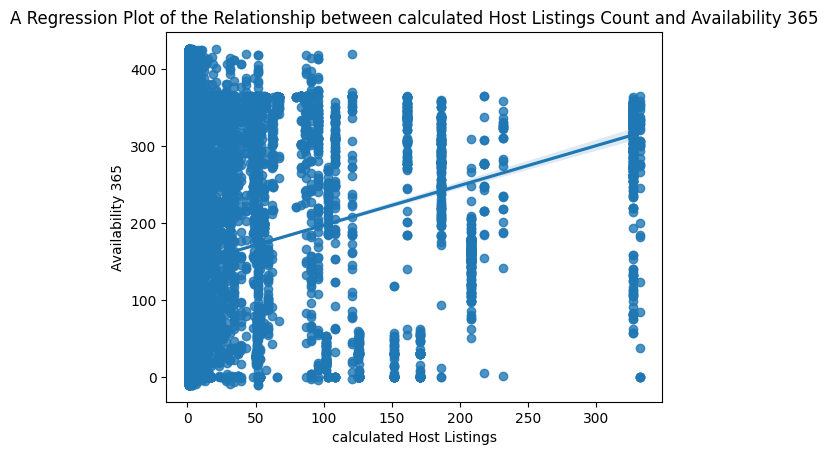

In [28]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df,x='calculated host listings count', y='availability 365');
plt.xlabel('calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between calculated Host Listings Count and Availability 365');

In [29]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.12756393426394577)